<a href="https://colab.research.google.com/github/kevin-bcs/kevin_carbajal/blob/main/L01_02_Neurona_McCulluch_Pitts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurona McCulluch y Pitts espacio geométrico
## Dr. Carlos Villaseñor

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Paso 2. Crea una clase que represente a la neurona artificial, inicializa los pesos sinápticos y el sesgo de manera aleatoria uniformemente distribuida entre -1 y 1. Posteriormete programa una función que nos permita hacer la predicción de cada punto. Considera la abstracción presentada en la clase.

In [15]:

class Neurona:
  def __init__(self, n_inputs):
    # Inicializa de manera aleatoria los pesos sinápticos y sesgo de la neurona
    self.w = -1 + 2*np.random.rand(n_inputs)
    self.b = -1 + 2*np.random.rand()

  def predict(self, X):
    # Obtener numero de entradas
    _, p = X.shape

    # Instanciar salida
    y_est = np.zeros(p)

    for i in range(p):
        # Programa la propagación de la neurona
      z = np.dot(self.w, X[:, i]) + self.b
      if z < 0:
        y_est[i] = 0
      else:
          y_est[i] = 1
    return y_est



Paso 3. Corre la siguiente función para dibujar el espacio geométrico de las dos clases.

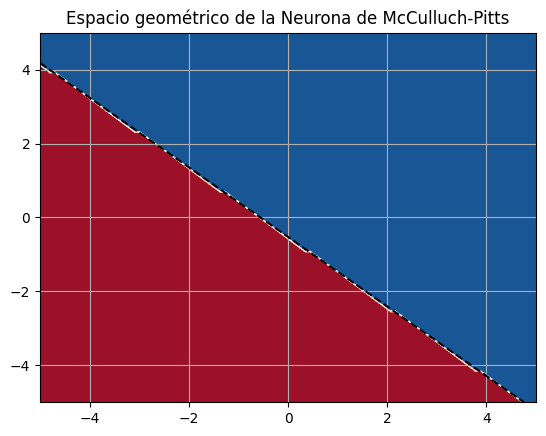

In [16]:
# Función para dibujar superficie de desición
def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b
  plt.plot([-5, 5],[(1/w2)*(-w1*(-5)-b),(1/w2)*(-w1*5-b)],'--k')

# Instanciamos la neurona
net = Neurona(2)

# Preparar datos
xmin, ymin = -5, -5
xmax, ymax = 5, 5
xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100),
                     np.linspace(ymin,ymax, 100))
X = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1).T

# Predecir cada punto
y_est = net.predict(X)
zz = y_est.reshape(xx.shape)

# Dibujar
plt.figure()
plt.title('Espacio geométrico de la Neurona de McCulluch-Pitts')
draw_2d_percep(net)
plt.contourf(xx, yy, zz, cmap=plt.cm.RdBu)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.grid()
plt.show()